# Time Series Analysis - Firdaus Adi Nugroho
### Sales contains the quarterly sales for a small company over the period 1981–2005. AdBudget is the advertising budget and GDP is the gross domestic product. All series have been adjusted for inflation.

In [245]:
#import package

import pandas as pd
import numpy as np
import warnings
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
from pyramid.arima import auto_arima
warnings.filterwarnings('ignore')

In [73]:
#load file

data = pd.read_csv('tute1.csv')
data.head()

,Unnamed: 0,Sales,AdBudget,GDP
0,Mar-81,1020.2,659.2,251.8
1,Jun-81,889.2,589.0,290.9
2,Sep-81,795.0,512.5,290.8
3,Dec-81,1003.9,614.1,292.4
4,Mar-82,1057.7,647.2,279.1


In [74]:
#check the collumn

data['Unnamed: 0'].head()

0    Mar-81
1    Jun-81
2    Sep-81
3    Dec-81
4    Mar-82
Name: Unnamed: 0, dtype: object

In [75]:
#Rename the Unnamed:0 to 'Date'

data=data.rename(columns = {'Unnamed: 0':'Date'})

In [76]:
data.head()

,Date,Sales,AdBudget,GDP
0,Mar-81,1020.2,659.2,251.8
1,Jun-81,889.2,589.0,290.9
2,Sep-81,795.0,512.5,290.8
3,Dec-81,1003.9,614.1,292.4
4,Mar-82,1057.7,647.2,279.1


In [77]:
#information of the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
Date        100 non-null object
Sales       100 non-null float64
AdBudget    100 non-null float64
GDP         100 non-null float64
dtypes: float64(3), object(1)
memory usage: 3.2+ KB


In [78]:
#dimension of dataset

data.shape

(100, 4)

In [79]:
data.head()

,Date,Sales,AdBudget,GDP
0,Mar-81,1020.2,659.2,251.8
1,Jun-81,889.2,589.0,290.9
2,Sep-81,795.0,512.5,290.8
3,Dec-81,1003.9,614.1,292.4
4,Mar-82,1057.7,647.2,279.1


In [80]:
#data['Date'] = pd.to_datetime(df['Date']).dt.strftime('%m-%Y')
#print(data)

In [81]:
#data['date'] = data['Date']

In [82]:
#df = pd.DataFrame(data=data, columns=['date'])
#data["date"] = list(map(lambda x: datetime.strptime(x, '%b-%y').strftime('%m-%Y'), data["date"]))
#print(data)

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
Date        100 non-null object
Sales       100 non-null float64
AdBudget    100 non-null float64
GDP         100 non-null float64
dtypes: float64(3), object(1)
memory usage: 3.2+ KB


In [84]:
#df['date'] = pd.to_datetime(df['date'])

In [85]:
#Change Date format from object to Datetime

year = []
month = []

for i in data['Date']:
    y=i.split('-')[1]
    month.append(i.split('-')[0])
    if y[0]!='0':
        year.append('19'+y)
    else:
        year.append('20'+y)

In [86]:
data['Date'] = pd.to_datetime(['{}-{}-01'.format(y,m) for y,m in zip(year,month)])

In [87]:
data.head()

,Date,Sales,AdBudget,GDP
0,1981-03-01,1020.2,659.2,251.8
1,1981-06-01,889.2,589.0,290.9
2,1981-09-01,795.0,512.5,290.8
3,1981-12-01,1003.9,614.1,292.4
4,1982-03-01,1057.7,647.2,279.1


In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
Date        100 non-null datetime64[ns]
Sales       100 non-null float64
AdBudget    100 non-null float64
GDP         100 non-null float64
dtypes: datetime64[ns](1), float64(3)
memory usage: 3.2 KB


In [14]:
#drop the AdBudget and GDP variable

data = data.drop(["AdBudget", "GDP"], axis=1)

In [15]:
data.head()

,Date,Sales
0,1981-03-01,1020.2
1,1981-06-01,889.2
2,1981-09-01,795.0
3,1981-12-01,1003.9
4,1982-03-01,1057.7


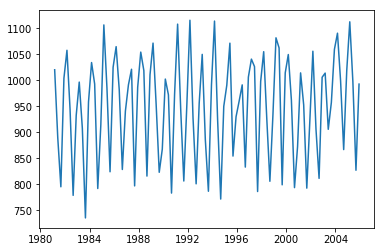

In [16]:
#set the index of dataframe and plot it.

abc = data.set_index(['Date'])
plt.plot(abc)

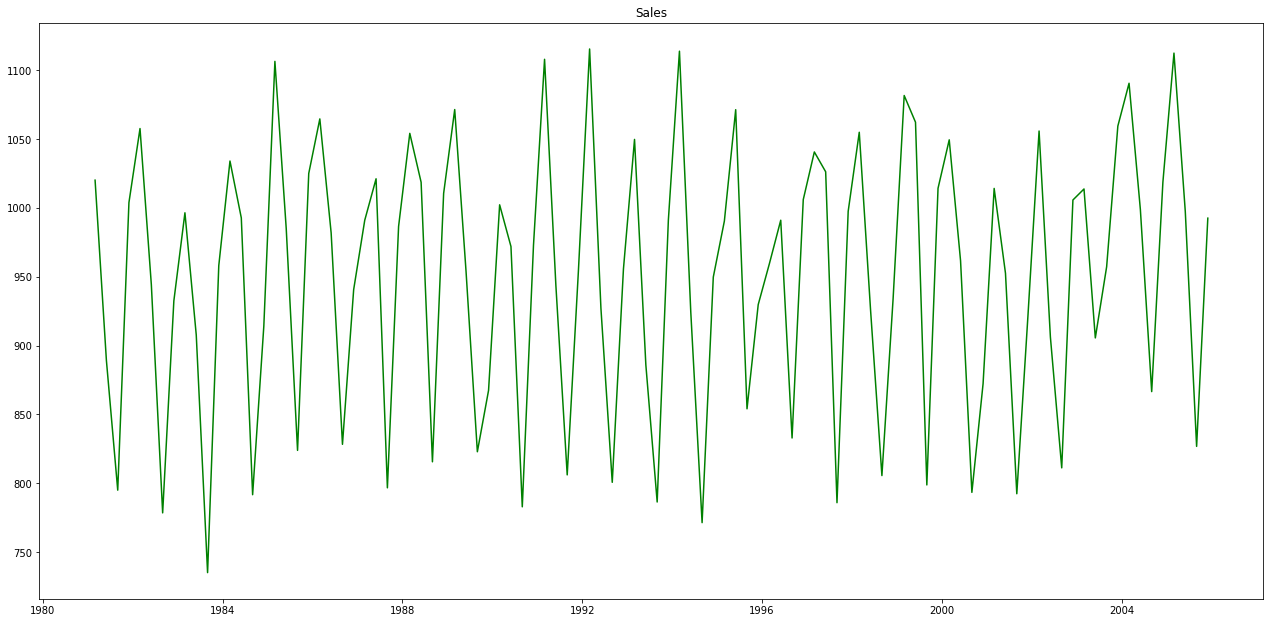

In [17]:
#plotting the datetime and Sales

fig = plt.figure(figsize=(17,8))
ax1 = fig.add_axes([0, 0, 1, 1])
ax1.set_title('Sales')

ax1.plot(data['Date'],
         data['Sales'],
         color='green')
plt.show()

In [93]:
#Determining rolling statistics

rolmean = abc.rolling(window=4).mean()
rolstd = abc.rolling(window=4).std()
print(rolmean,rolstd)

               Sales
Date                
1981-03-01       NaN
1981-06-01       NaN
1981-09-01       NaN
1981-12-01   927.075
1982-03-01   936.450
1982-06-01   950.250
1982-09-01   946.125
1982-12-01   928.275
1983-03-01   912.975
1983-06-01   903.800
1983-09-01   892.950
1983-12-01   899.350
1984-03-01   908.750
1984-06-01   930.025
1984-09-01   944.175
1984-12-01   933.200
1985-03-01   951.300
1985-06-01   949.375
1985-09-01   957.425
1985-12-01   985.150
1986-03-01   974.700
1986-06-01   973.900
1986-09-01   975.000
1986-12-01   953.900
1987-03-01   935.500
1987-06-01   945.325
1987-09-01   937.425
1987-12-01   948.900
1988-03-01   964.675
1988-06-01   964.050
...              ...
1998-09-01   945.950
1998-12-01   930.075
1999-03-01   936.750
1999-06-01   970.925
1999-09-01   969.225
1999-12-01   989.275
2000-03-01   981.225
2000-06-01   956.075
2000-09-01   954.725
2000-12-01   919.225
2001-03-01   910.400
2001-06-01   908.125
2001-09-01   907.875
2001-12-01   920.375
2002-03-01   

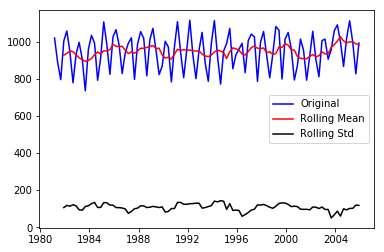

In [19]:
#plot rolling statistics

orig = plt.plot(abc, color='blue', label = 'Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.show(block=False)

In [20]:
from statsmodels.tsa.stattools import adfuller

#Perform Dickey-Fuller test

print('Result of Dickey-Fuller Test: ')
dftest = adfuller(abc['Sales'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)' %key] = value
    
print(dfoutput)

Result of Dickey-Fuller Test: 
Test Statistic                 -3.262755
p-value                         0.016628
#Lags Used                      9.000000
Number of Observations Used    90.000000
Critical Value (1%)            -3.505190
Critical Value (5%)            -2.894232
Critical Value (10%)           -2.584210
dtype: float64


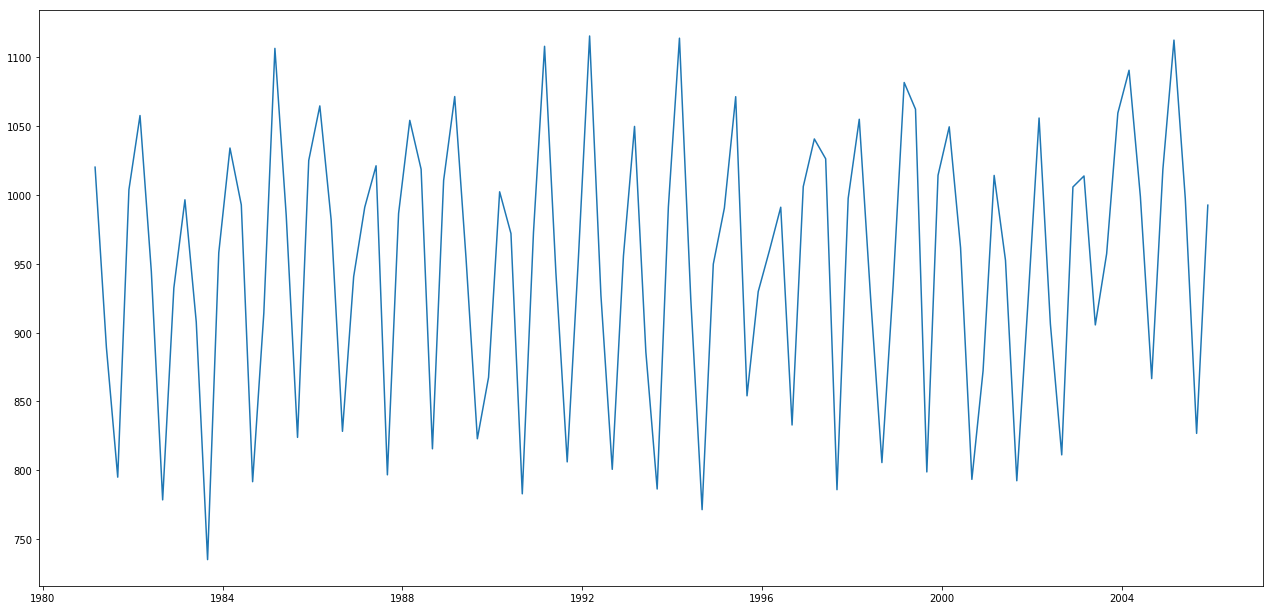

In [191]:
#Estimating trend

fig = plt.figure(figsize=(17,8))
ax1 = fig.add_axes([0, 0, 1, 1])
#abc_logScale = np.log(abc)
plt.plot(abc)

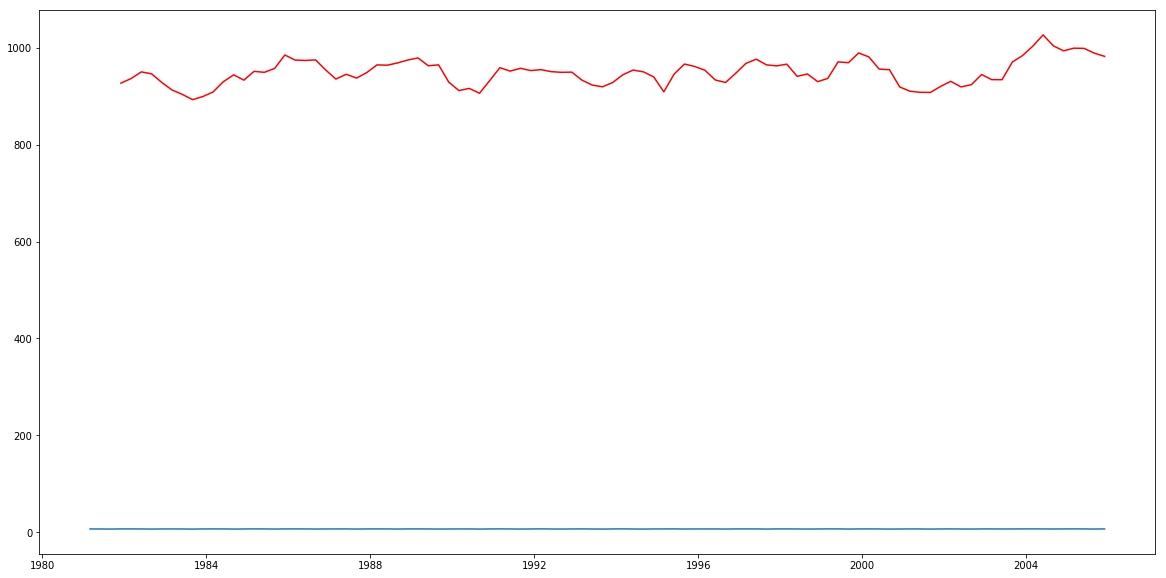

In [192]:
#Estimating moving Average

movingAverage = abc.rolling(window=4).mean()
movingSTD = abc_logScale.rolling(window=4).std()
plt.plot(abc_logScale)
plt.plot(movingAverage, color='red')

In [193]:
dataLogScaleMinusMovingAverage = abc - movingAverage
dataLogScaleMinusMovingAverage.head(12)

#Remove Nam Values
dataLogScaleMinusMovingAverage.dropna(inplace=True)
dataLogScaleMinusMovingAverage.head(10)

,Sales
Date,
1981-12-01,76.825
1982-03-01,121.250
1982-06-01,-5.850
1982-09-01,-167.625
1982-12-01,4.225
1983-03-01,83.525
1983-06-01,3.900
1983-09-01,-157.850
1983-12-01,58.750


In [195]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
  
  #Determing rolling statistics
  movingAverage = timeseries.rolling(window=4).mean()
  movingSTD = timeseries.rolling(window=4).std()
  
  #Plot rolling statistics:
  orig = plt.plot(timeseries, color='blue',label='Original')
  mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
  std = plt.plot(movingSTD, color='black', label='Rolling Std')
  plt.legend(loc='best')
  plt.title('Rolling Mean & Standard Deviation')
  plt.show(block=False)
  
  #Perform Dickey-Fuller test:
  print('Result of Dickey-Fuller Test:')
  dftest = adfuller(timeseries['Sales'], autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lag Used','Number of Observations Used'])
  for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
  print(dfoutput)

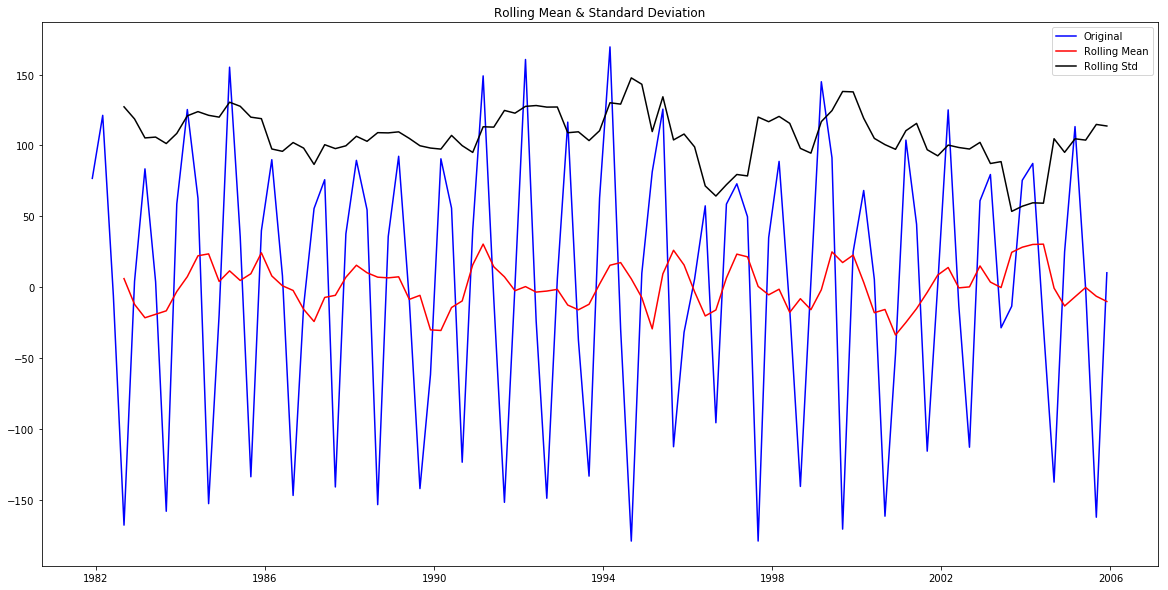

Result of Dickey-Fuller Test:
Test Statistic                 -4.862732
p-value                         0.000041
#Lag Used                       9.000000
Number of Observations Used    87.000000
Critical Value (1%)            -3.507853
Critical Value (5%)            -2.895382
Critical Value (10%)           -2.584824
dtype: float64


In [196]:
#Melakukan pengecekan stasionary

test_stationarity(dataLogScaleMinusMovingAverage)

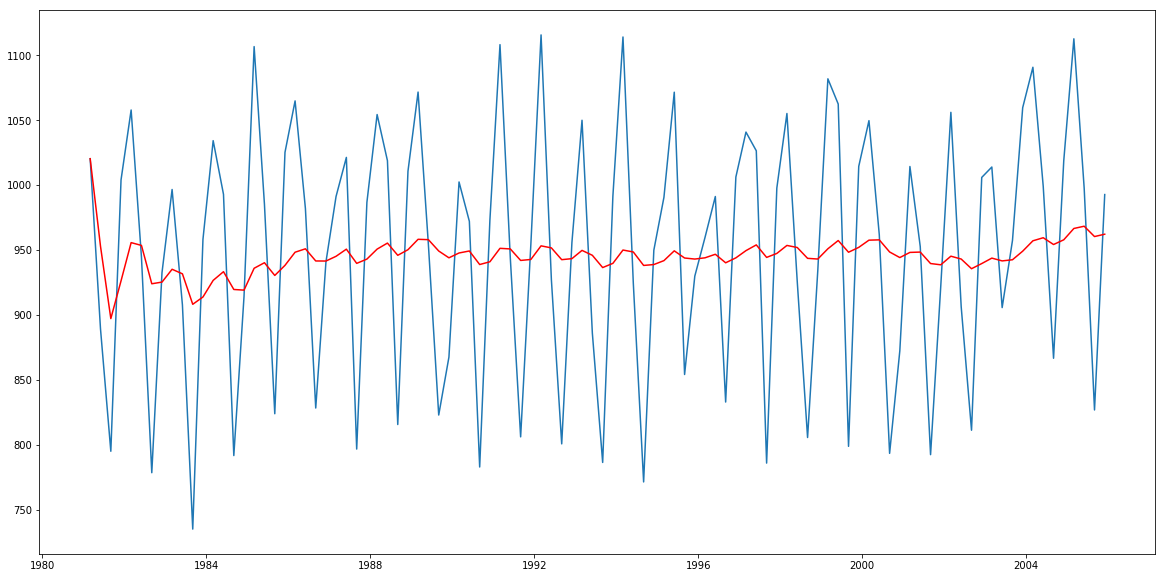

In [197]:
exponentialDecayWeightedAverage = abc.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(abc)
plt.plot(exponentialDecayWeightedAverage, color='red')

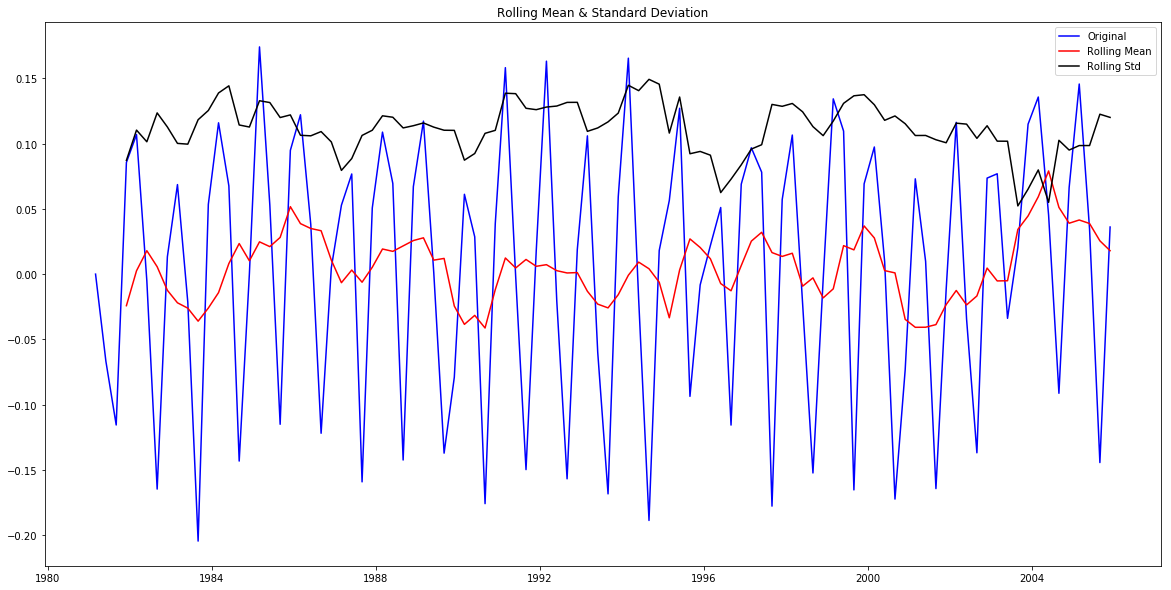

Result of Dickey-Fuller Test:
Test Statistic                 -3.266556
p-value                         0.016441
#Lag Used                       8.000000
Number of Observations Used    91.000000
Critical Value (1%)            -3.504343
Critical Value (5%)            -2.893866
Critical Value (10%)           -2.584015
dtype: float64


In [163]:
datasetLogScaleMinusMovingExponentialDecayAverage = abc_logScale -  exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

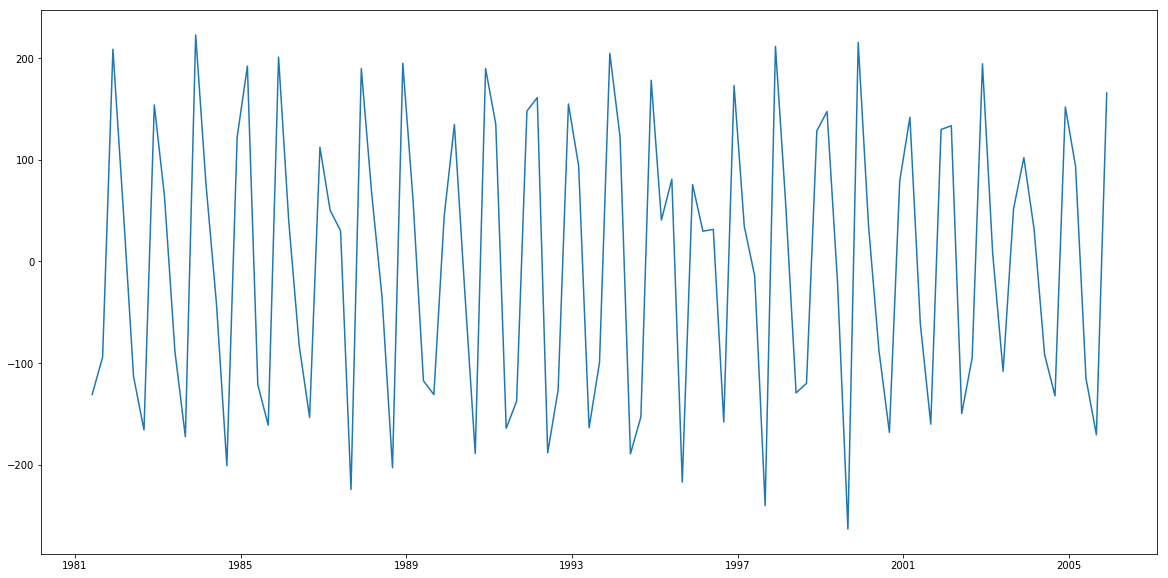

In [198]:
datasetLogDiffShifting = abc- abc.shift()
plt.plot(datasetLogDiffShifting)

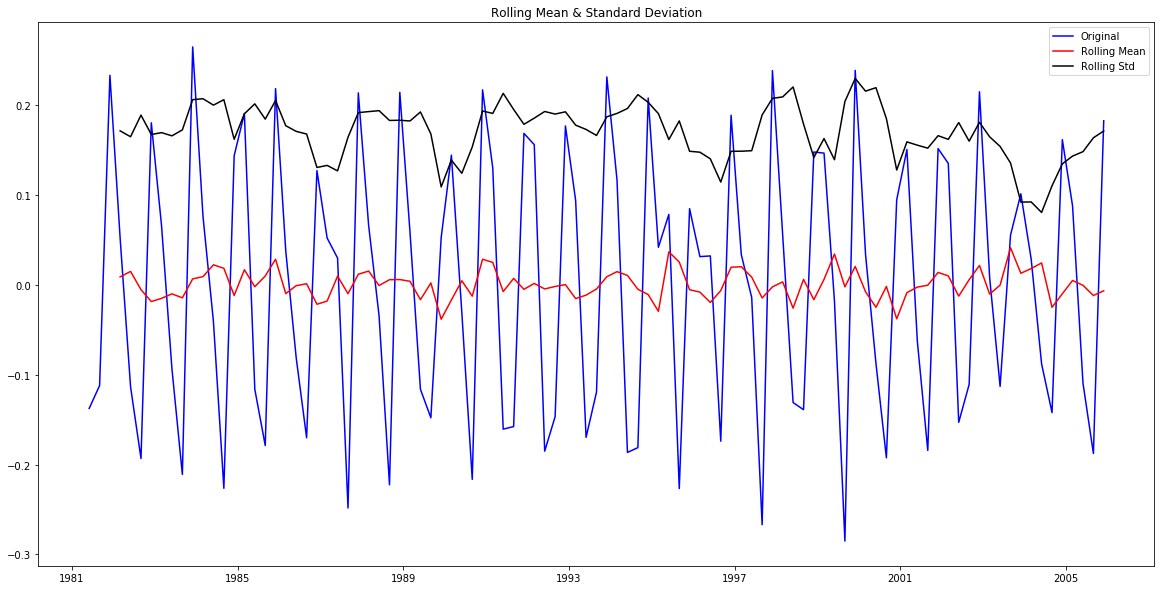

Result of Dickey-Fuller Test:
Test Statistic                 -5.098185
p-value                         0.000014
#Lag Used                      10.000000
Number of Observations Used    88.000000
Critical Value (1%)            -3.506944
Critical Value (5%)            -2.894990
Critical Value (10%)           -2.584615
dtype: float64


In [165]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

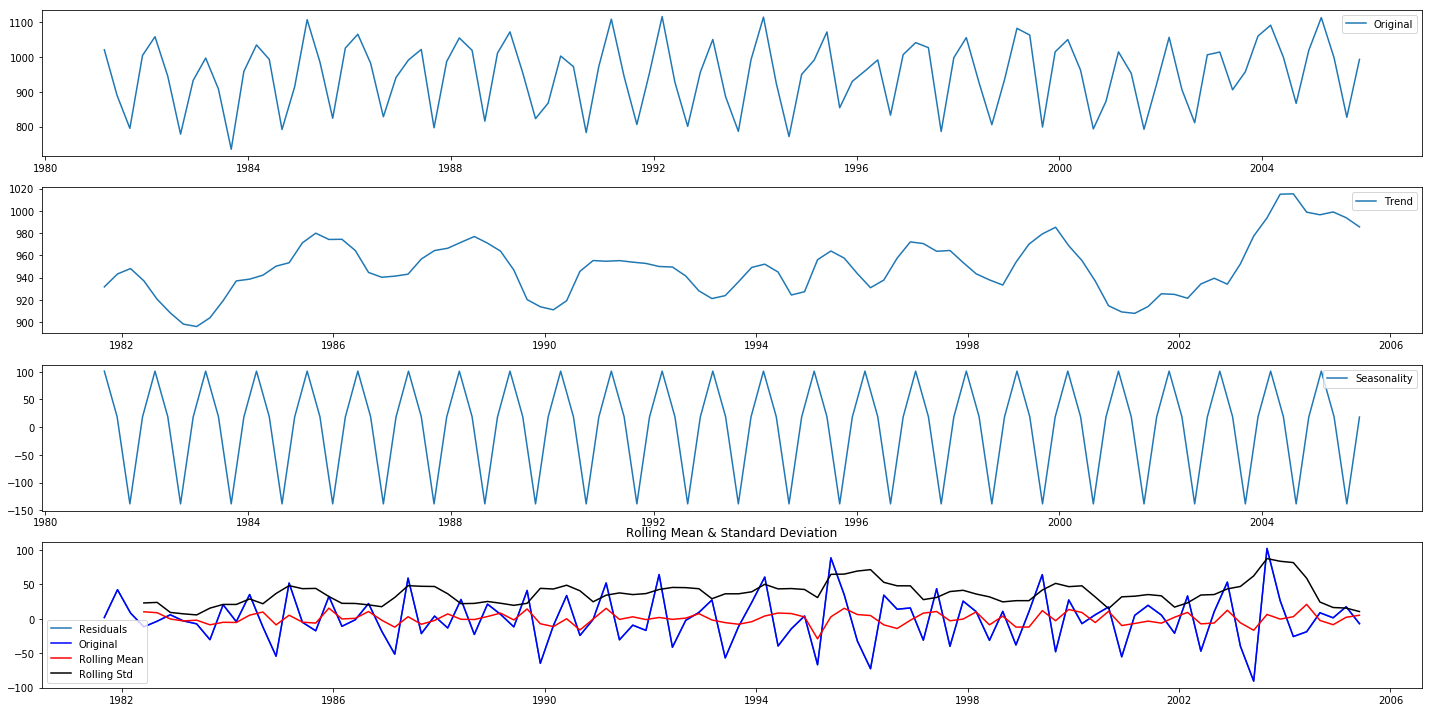

Result of Dickey-Fuller Test:
Test Statistic                -6.192363e+00
p-value                        6.079320e-08
#Lag Used                      8.000000e+00
Number of Observations Used    8.700000e+01
Critical Value (1%)           -3.507853e+00
Critical Value (5%)           -2.895382e+00
Critical Value (10%)          -2.584824e+00
dtype: float64


In [201]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(abc)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(abc, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

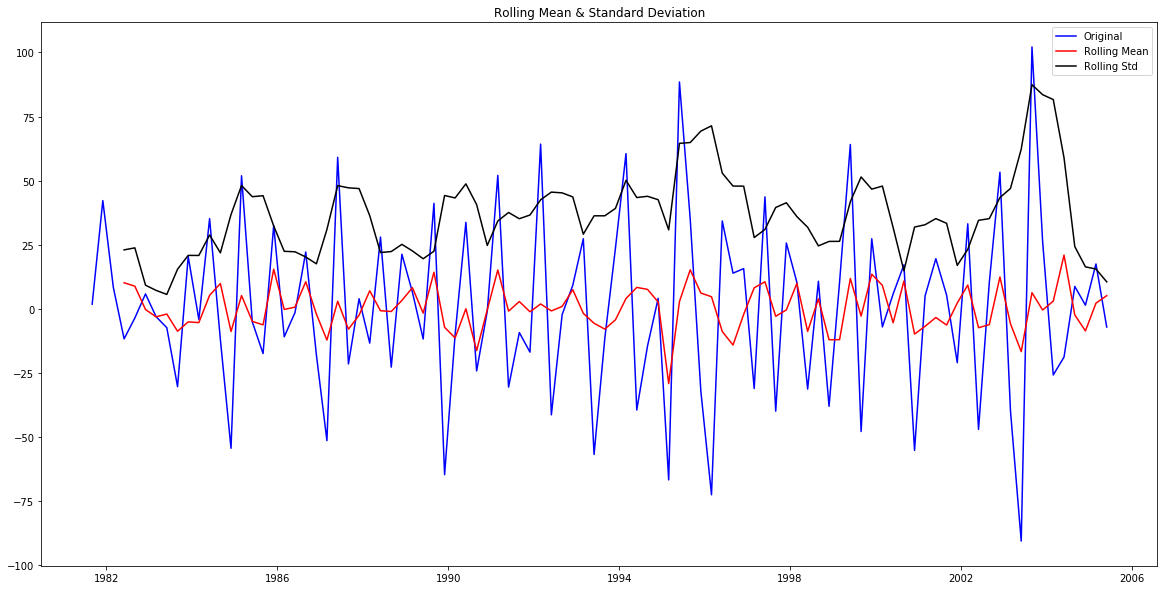

Result of Dickey-Fuller Test:
Test Statistic                -6.192363e+00
p-value                        6.079320e-08
#Lag Used                      8.000000e+00
Number of Observations Used    8.700000e+01
Critical Value (1%)           -3.507853e+00
Critical Value (5%)           -2.895382e+00
Critical Value (10%)          -2.584824e+00
dtype: float64


In [202]:
ecomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

C:\Users\firdau064122\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


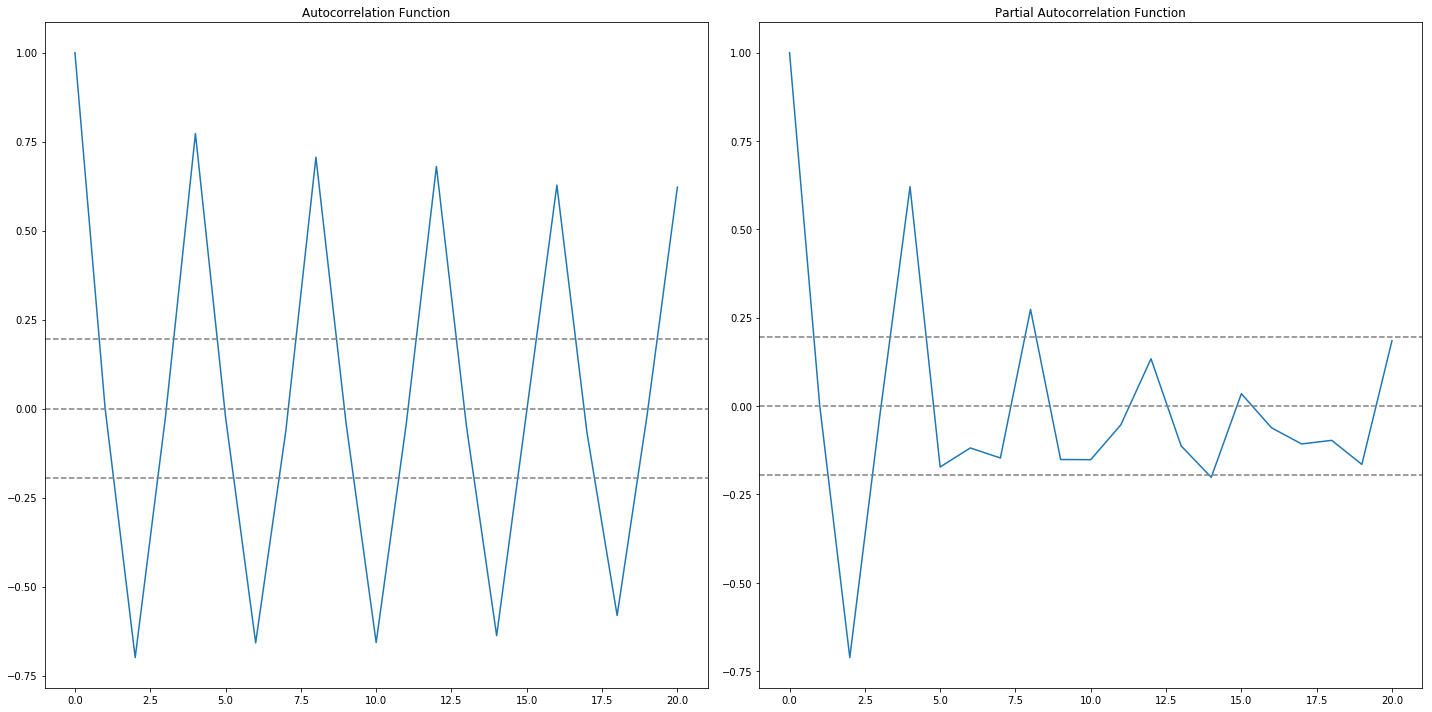

In [203]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(abc, nlags=20)
lag_pacf = pacf(abc, nlags=20,method='ols')

#plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

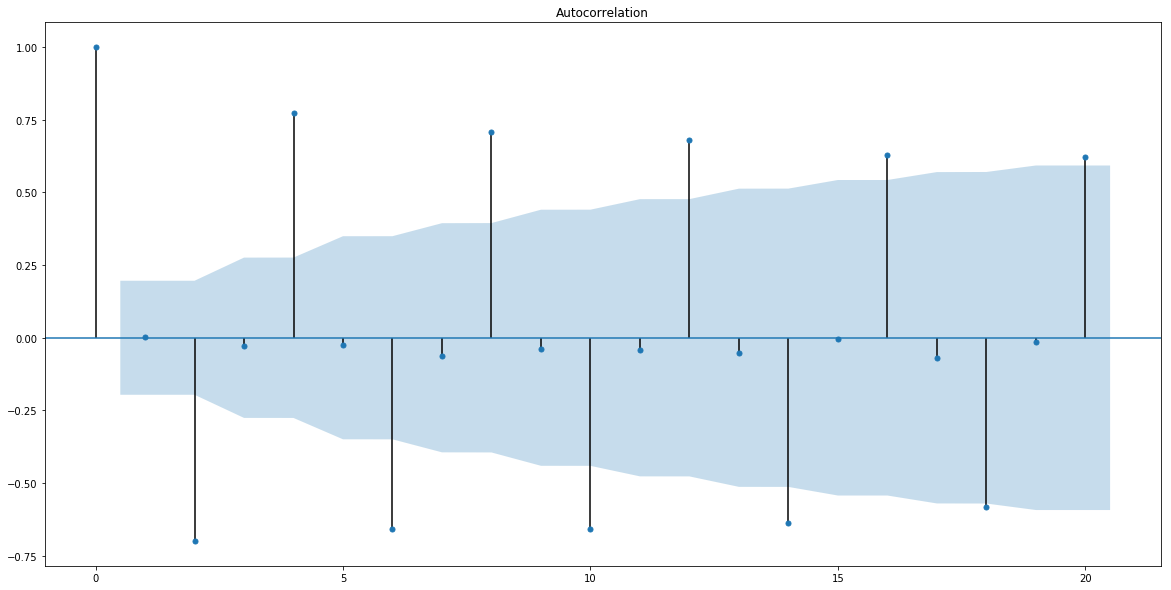

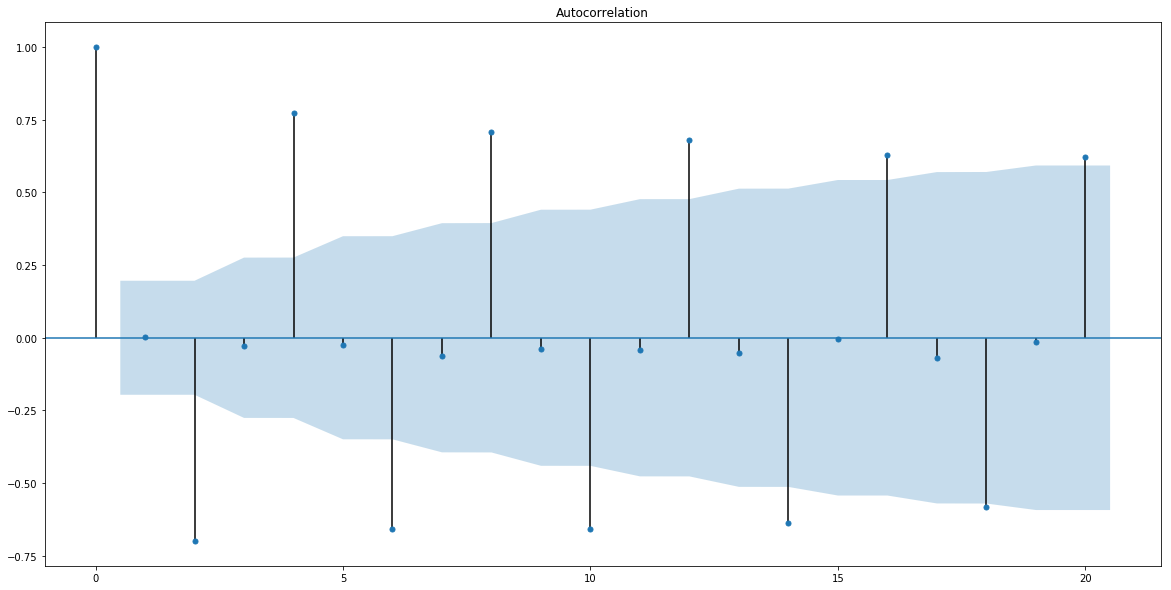

In [168]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(abc, lags=20)

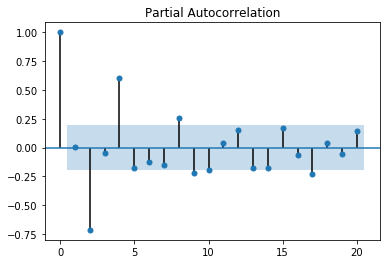

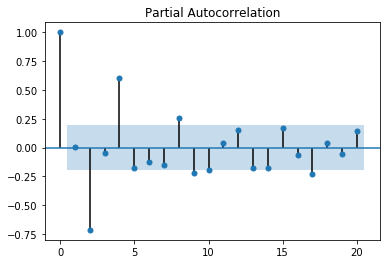

In [34]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_pacf(abc, lags=20)

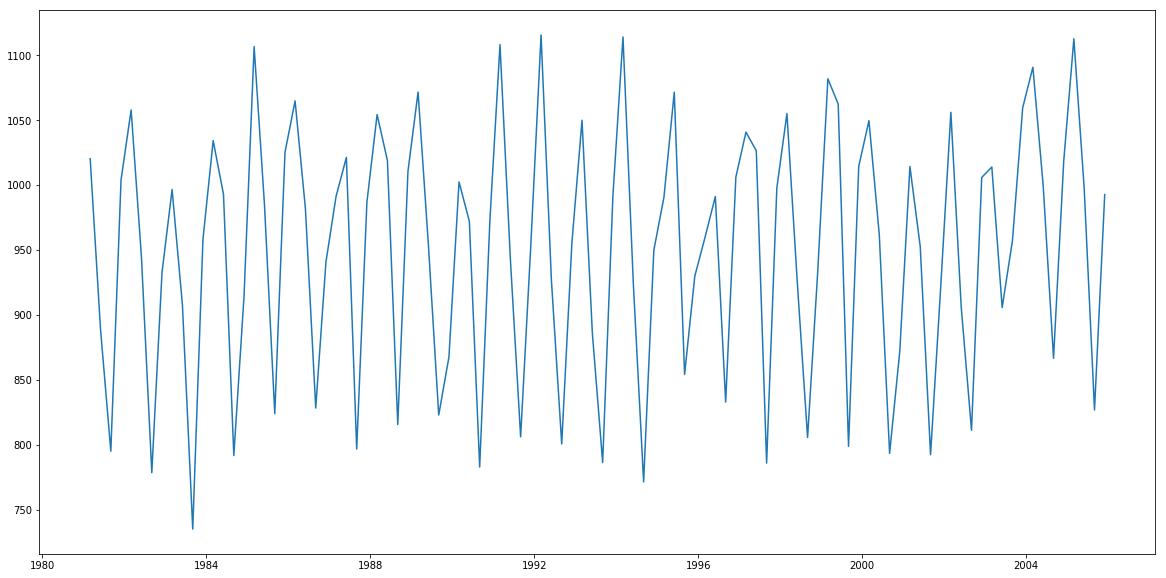

In [169]:
plt.plot(abc)

C:\Users\firdau064122\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  % freq, ValueWarning)
C:\Users\firdau064122\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  % freq, ValueWarning)


Plotting AR model


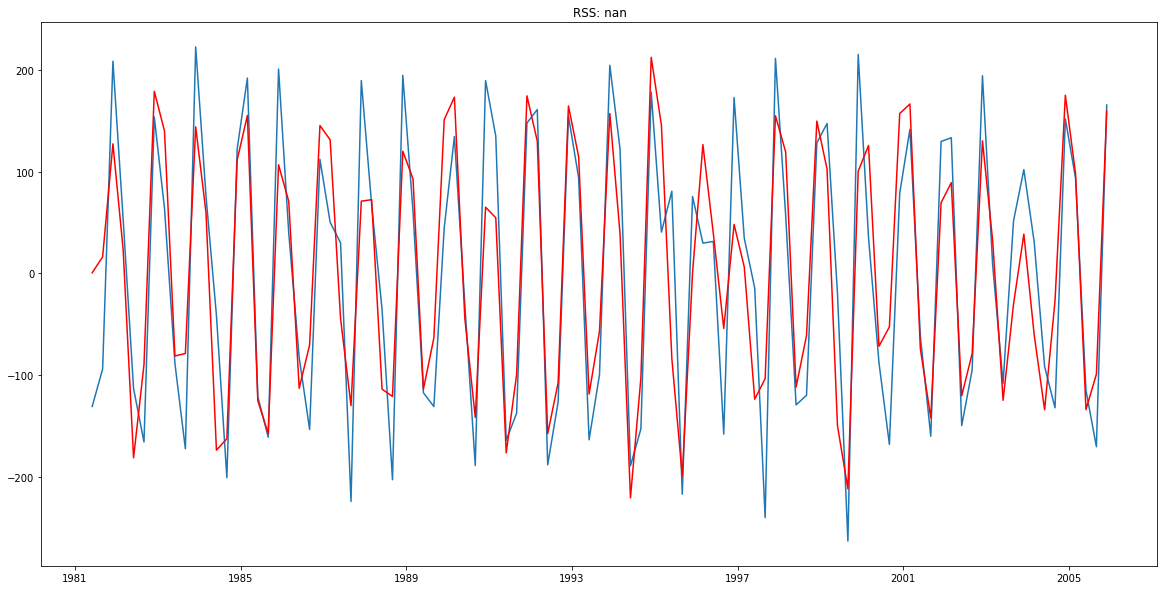

In [211]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(abc, order=(2,1,2))
results_AR = model.fit(disp=-1)
predict1 = results_AR.fittedvalues
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetLogDiffShifting['Sales'])**2))
print('Plotting AR model')

In [171]:
results_AR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                   99
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 116.836
Method:                       css-mle   S.D. of innovations              0.073
Date:                Fri, 06 Sep 2019   AIC                           -221.672
Time:                        07:14:23   BIC                           -206.101
Sample:                    06-01-1981   HQIC                          -215.372
                         - 12-01-2005                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0006      0.002      0.276      0.783      -0.004       0.005
ar.L1.D.Sales     0.0200      0.059      0.340      0.734      -0.095       0.135
ar.L2.D.Sales    -0.8550      0.064    -13.413      0.000      -0.980      -0.730
ma.L1.D.Sales    -0.8337      0.124     -6.746      0.000      -1.076      -0.591
ma.L2.D.Sales     0.4002      0.116      3.450      0.001       0.173       0.628
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.0117           -1.0814j            1.0814           -0.2483
AR.2            0.0117           +1.0814j            1.0814            0.2483
MA.1            1.0417           -1.1890j            1.5808           -0.1355
MA.2            1.0417           +1.1890j            1.5808            0.1355
-----------------------------------------------------------------------------
"""

C:\Users\firdau064122\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  % freq, ValueWarning)
C:\Users\firdau064122\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  % freq, ValueWarning)


Plotting AR model


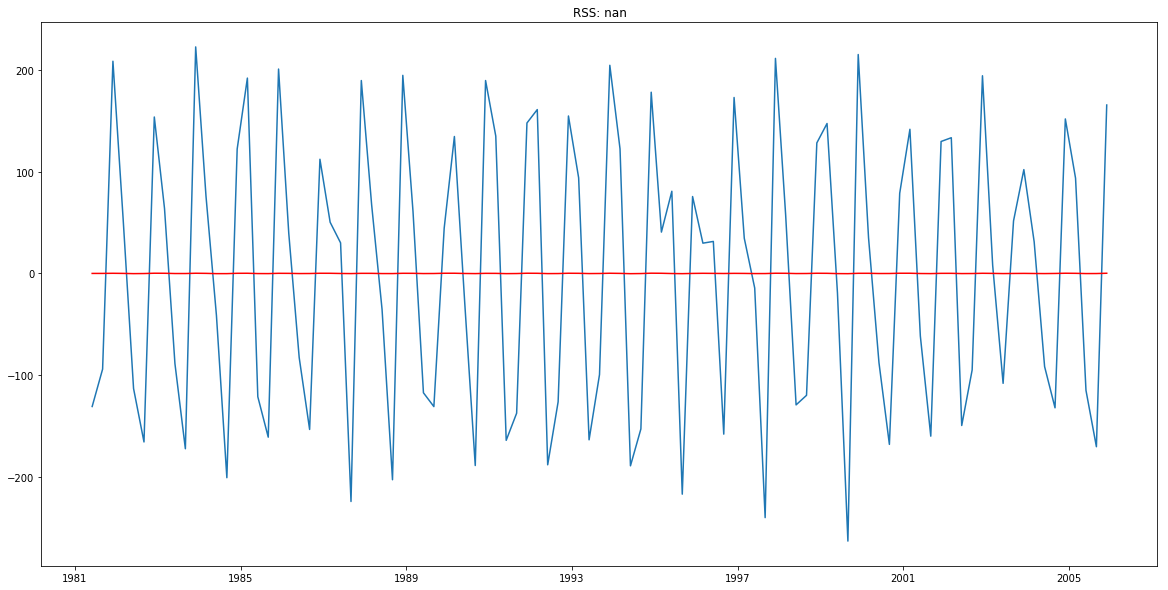

In [212]:
model = ARIMA(abc_logScale, order=(2,1,2))
results_MA=model.fit(disp=1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-datasetLogDiffShifting['Sales'])**2))
print('Plotting AR model')

In [175]:
results_MA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                   99
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 116.836
Method:                       css-mle   S.D. of innovations              0.073
Date:                Fri, 06 Sep 2019   AIC                           -221.672
Time:                        07:14:53   BIC                           -206.101
Sample:                    06-01-1981   HQIC                          -215.372
                         - 12-01-2005                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0006      0.002      0.276      0.783      -0.004       0.005
ar.L1.D.Sales     0.0200      0.059      0.340      0.734      -0.095       0.135
ar.L2.D.Sales    -0.8550      0.064    -13.413      0.000      -0.980      -0.730
ma.L1.D.Sales    -0.8337      0.124     -6.746      0.000      -1.076      -0.591
ma.L2.D.Sales     0.4002      0.116      3.450      0.001       0.173       0.628
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.0117           -1.0814j            1.0814           -0.2483
AR.2            0.0117           +1.0814j            1.0814            0.2483
MA.1            1.0417           -1.1890j            1.5808           -0.1355
MA.2            1.0417           +1.1890j            1.5808            0.1355
-----------------------------------------------------------------------------
"""

C:\Users\firdau064122\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  % freq, ValueWarning)
C:\Users\firdau064122\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  % freq, ValueWarning)


Text(0.5,1,'RSS: nan')

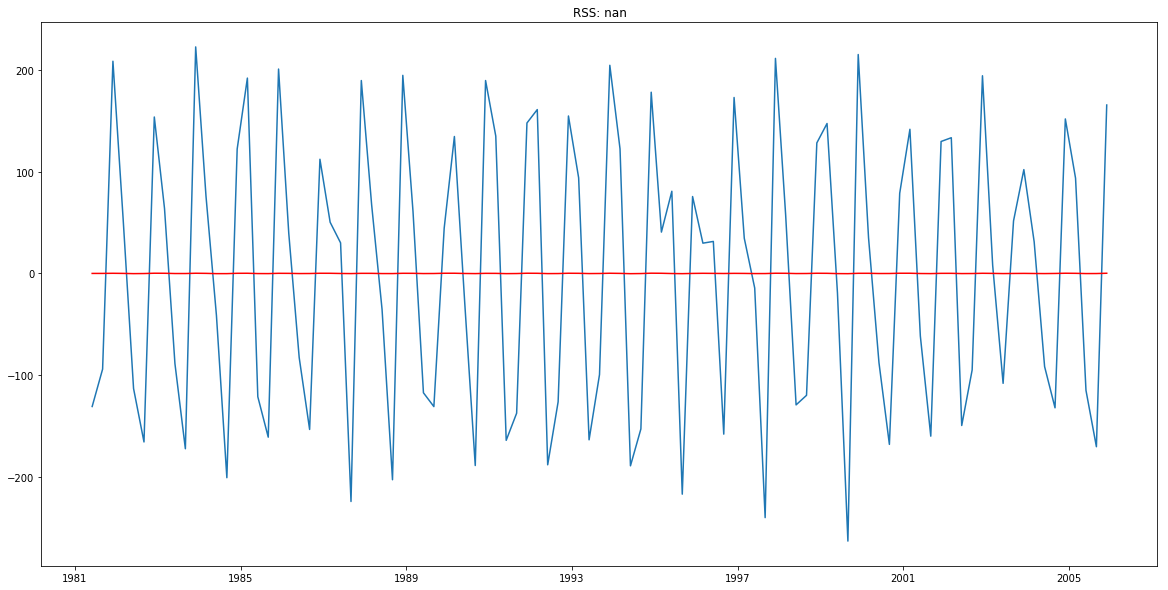

In [213]:
model = ARIMA(abc_logScale, order=(2,1,2))
results_ARIMA= model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-datasetLogDiffShifting['Sales'])**2))

In [177]:
train = abc[:int(0.75*(len(abc)))]
valid = abc[int(0.75*(len(abc))):]

In [246]:
model = auto_arima(train,trace=True, error_action='ignore', suppress_warning=False)
model.fit(train)

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=820.381, BIC=834.286, Fit time=0.606 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=907.266, BIC=911.901, Fit time=0.017 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=909.220, BIC=916.172, Fit time=0.092 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=907.901, BIC=914.854, Fit time=0.178 seconds
Fit ARIMA: order=(1, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=884.316, BIC=895.904, Fit time=0.419 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=819.475, BIC=835.697, Fit time=0.735 seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=845.479, BIC=859.384, Fit time=0.702 seconds
Fit ARIMA: order=(3, 0, 3) seasonal_order=(0, 0, 0, 1); AIC=817.883, BIC=836.423, Fit time=0.907 seconds
Fit ARIMA: order=(4, 0, 4) seasonal_order=(0, 0, 0, 1); AIC=812.759, BIC=835.933, Fit time=1.024 seconds
Fit ARIMA: order=(3, 0, 4) seasonal_order=(0, 0, 0, 1);

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(4, 0, 5),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(0, 0, 0, 1), solver='lbfgs', start_params=None,
   suppress_warnings=False, transparams=True, trend='c')

In [222]:
predictions_ARIMA_diff = pd.Series(results_AR.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Date
1981-06-01      0.606651
1981-09-01     16.284325
1981-12-01    127.583494
1982-03-01     23.696466
1982-06-01   -181.526459
dtype: float64


In [223]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Date
1981-06-01      0.606651
1981-09-01     16.890976
1981-12-01    144.474470
1982-03-01    168.170936
1982-06-01    -13.355523
dtype: float64


In [224]:
predictions_ARIMA_log = pd.Series(abc['Sales'].ix[0], index=abc.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

Date
1981-03-01    1020.200000
1981-06-01    1020.806651
1981-09-01    1037.090976
1981-12-01    1164.674470
1982-03-01    1188.370936
dtype: float64

C:\Users\firdau064122\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


NameError: name 'predictions_AR' is not defined

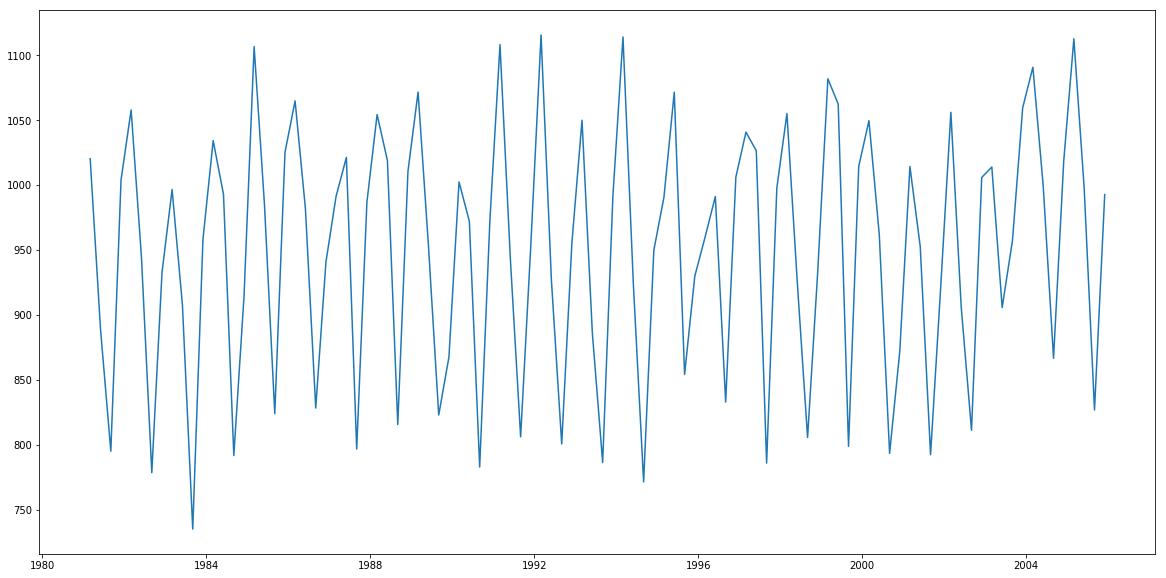

In [225]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(abc)
plt.plot(predictions_AR)

C:\Users\firdau064122\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


NameError: name 'predictions_AR' is not defined

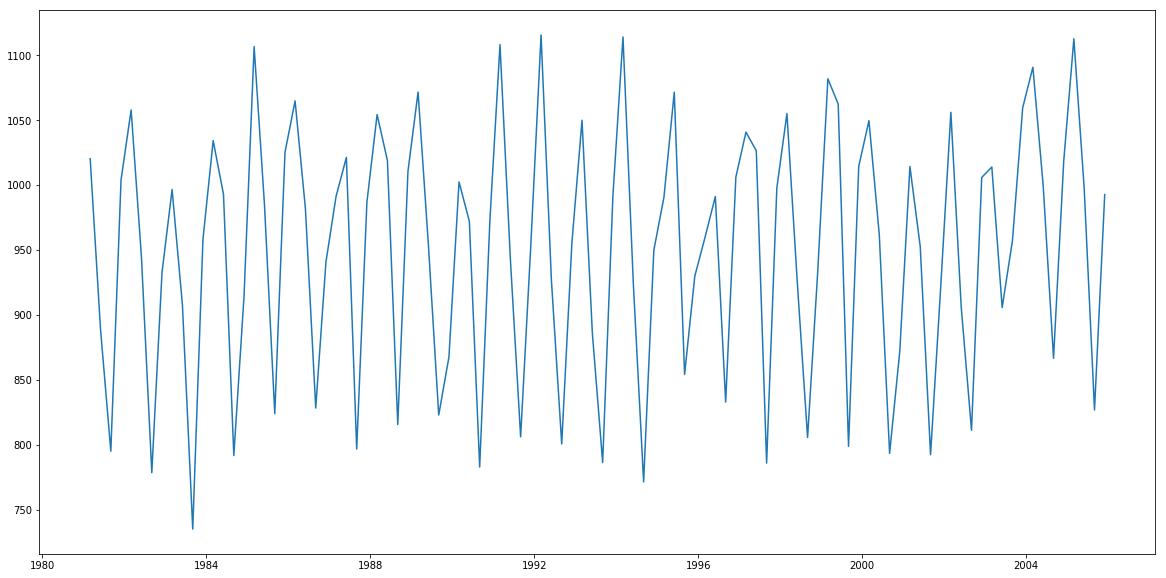

In [226]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(abc)
plt.plot(predictions_AR)


In [218]:
abc

,Sales
Date,
1981-03-01,1020.2
1981-06-01,889.2
1981-09-01,795.0
1981-12-01,1003.9
1982-03-01,1057.7
1982-06-01,944.4
1982-09-01,778.5
1982-12-01,932.5
1983-03-01,996.5


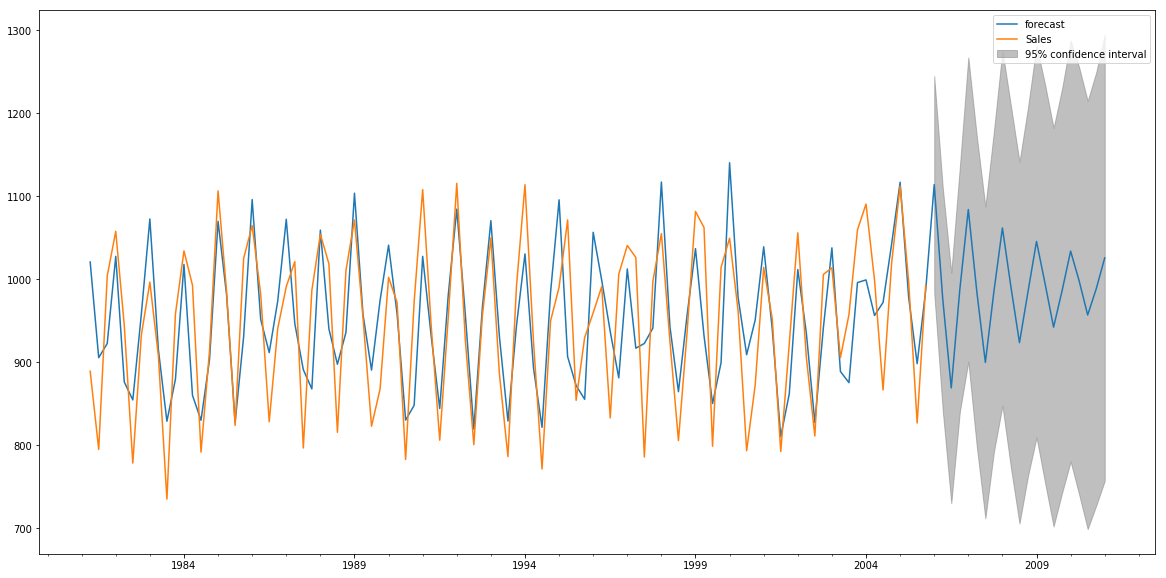

In [235]:
results_AR.plot_predict(1,120)
x=results_AR.forecast(steps=120)

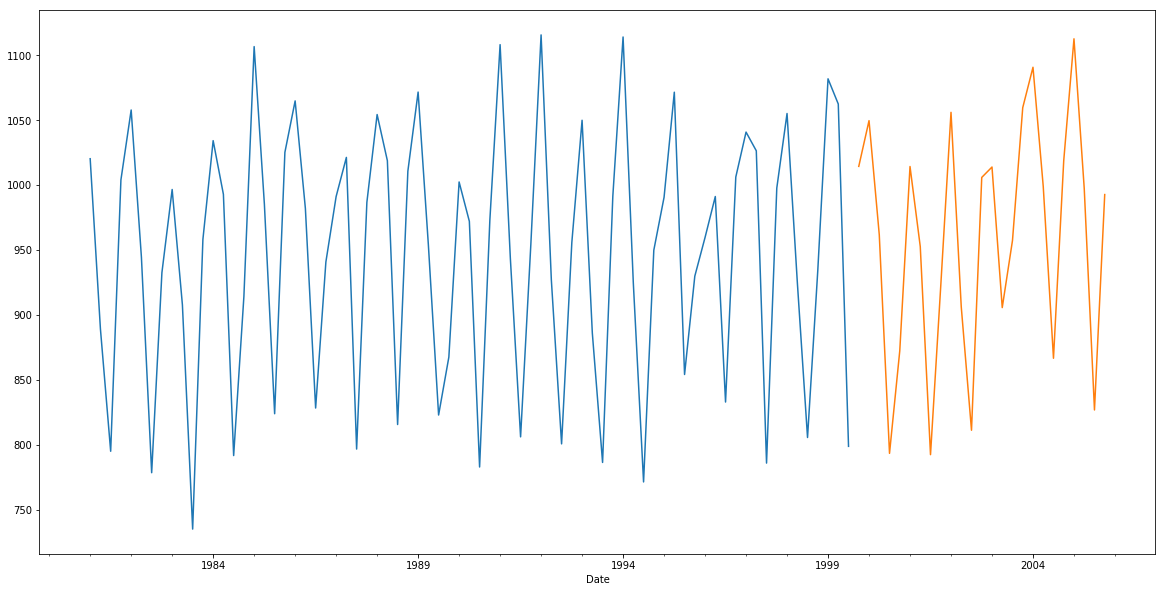

In [236]:
train = abc[:int(0.75*(len(abc)))]
valid = abc[int(0.75*(len(abc))):]

train['Sales'].plot()
valid['Sales'].plot()

In [247]:
model = auto_arima(train, trace=True, error_action='ignore', suppress_warning=True)
model.fit(train)

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=820.381, BIC=834.286, Fit time=0.660 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=907.266, BIC=911.901, Fit time=0.013 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=909.220, BIC=916.172, Fit time=0.072 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=907.901, BIC=914.854, Fit time=0.181 seconds
Fit ARIMA: order=(1, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=884.316, BIC=895.904, Fit time=0.531 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=819.475, BIC=835.697, Fit time=0.748 seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=845.479, BIC=859.384, Fit time=0.635 seconds
Fit ARIMA: order=(3, 0, 3) seasonal_order=(0, 0, 0, 1); AIC=817.883, BIC=836.423, Fit time=0.969 seconds
Fit ARIMA: order=(4, 0, 4) seasonal_order=(0, 0, 0, 1); AIC=812.759, BIC=835.933, Fit time=1.169 seconds
Fit ARIMA: order=(3, 0, 4) seasonal_order=(0, 0, 0, 1);

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(4, 0, 5),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(0, 0, 0, 1), solver='lbfgs', start_params=None,
   suppress_warnings=False, transparams=True, trend='c')

In [237]:
forecast = model.predict(n_periods = len(valid))
forecast = pd.DataFrame(forecast, index = valid.index, columns=['Prediction'])

plt.plot(abc.Sales, label = 'Train')
plt.plot(forecast, label = 'Prediction')
plt.show()

TypeError: predict() got an unexpected keyword argument 'n_periods'

In [230]:
fc, se, conf = results_AR.forecast(3, alpha=0.05)
fc_series = pd.Series(fc)
fc_series

0    1114.050926
1     976.326626
2     869.045502
dtype: float64

In [231]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import math
from pylab import rcParams

In [232]:
mod = sm.tsa.statespace.SARIMAX(endog=train.values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 1, 2, 24),
                                enforce_stationarity=True,
                                enforce_invertibility=False)

In [233]:
results = mod.fit()
print(results.summary().tables[1])

ValueError: maxlag should be < nobs

In [154]:
plot_forecasts(train, test, forecast)

NameError: name 'plot_forecasts' is not defined

In [240]:
import itertools

p = d = q = range(0, 2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0],x[1],x[2],6 ) for x in list (itertools.product(p,d,q))]
print('Example of paramter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[2],seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1],seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2],seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2],seasonal_pdq[4]))

Example of paramter combinations for Seasonal ARIMA...
SARIMAX: (0, 1, 0) x (0, 0, 1, 6)
SARIMAX: (0, 0, 1) x (0, 1, 0, 6)
SARIMAX: (0, 1, 0) x (0, 1, 1, 6)
SARIMAX: (0, 1, 0) x (1, 0, 0, 6)


In [248]:
min_aic = 9999999
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train,
                                           order=param,
                                           seasonal_order=param_seasonal,
                                           enforce_stationarity=False,
                                           enforce_invertibility=False)
            
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param,param_seasonal,results.aic))
            
            if results.aic<min_aic:
                min_aic = results.aic
                min_aic_model = results
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 6)12 - AIC:1226.6596910557444
ARIMA(0, 0, 0)x(0, 0, 1, 6)12 - AIC:1071.865629670918
ARIMA(0, 0, 0)x(0, 1, 0, 6)12 - AIC:903.9481815084724
ARIMA(0, 0, 0)x(0, 1, 1, 6)12 - AIC:757.9714164720123
ARIMA(0, 0, 0)x(1, 0, 0, 6)12 - AIC:919.1907526269232
ARIMA(0, 0, 0)x(1, 0, 1, 6)12 - AIC:841.176724846719
ARIMA(0, 0, 0)x(1, 1, 0, 6)12 - AIC:699.8689781731325
ARIMA(0, 0, 0)x(1, 1, 1, 6)12 - AIC:686.9956490751272
ARIMA(0, 0, 1)x(0, 0, 0, 6)12 - AIC:1129.1944330486958
ARIMA(0, 0, 1)x(0, 0, 1, 6)12 - AIC:990.0478468474464
ARIMA(0, 0, 1)x(0, 1, 0, 6)12 - AIC:871.7409686484127
ARIMA(0, 0, 1)x(0, 1, 1, 6)12 - AIC:739.9969783553038
ARIMA(0, 0, 1)x(1, 0, 0, 6)12 - AIC:899.2030733490676
ARIMA(0, 0, 1)x(1, 0, 1, 6)12 - AIC:821.0346314166036
ARIMA(0, 0, 1)x(1, 1, 0, 6)12 - AIC:701.8424733868643
ARIMA(0, 0, 1)x(1, 1, 1, 6)12 - AIC:676.6181127512722
ARIMA(0, 1, 0)x(0, 0, 0, 6)12 - AIC:933.3784107072913
ARIMA(0, 1, 0)x(0, 0, 1, 6)12 - AIC:845.6227821499635
ARIMA(0, 1, 0)x(0, 1, 0, 6)

In [249]:
min_aic_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                             Sales   No. Observations:                   75
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 6)   Log Likelihood                -330.425
Date:                           Fri, 06 Sep 2019   AIC                            668.850
Time:                                   07:48:35   BIC                            677.227
Sample:                               03-01-1981   HQIC                           672.127
                                    - 09-01-1999                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000    409.235     -0.002      0.998    -803.087     801.087
ar.S.L6       -0.9876      0.010    -94.200      0.000      -1.008      -0.967
ma.S.L6        1.0000    409.228      0.002      0.998    -801.072     803.072
sigma2      2775.3339      0.146    1.9e+04      0.000    2775.047    2775.620
===================================================================================
Ljung-Box (Q):                       48.52   Jarque-Bera (JB):                 2.36
Prob(Q):                              0.17   Prob(JB):                         0.31
Heteroskedasticity (H):               1.49   Skew:                            -0.05
Prob(H) (two-sided):                  0.38   Kurtosis:                         2.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.34e+23. Standard errors may be unstable.
"""

In [250]:
start_index = valid.index.min()
end_index = valid.index.max()

pred = min_aic_model.get_prediction(start=start_index,end=end_index,dynamic=False)

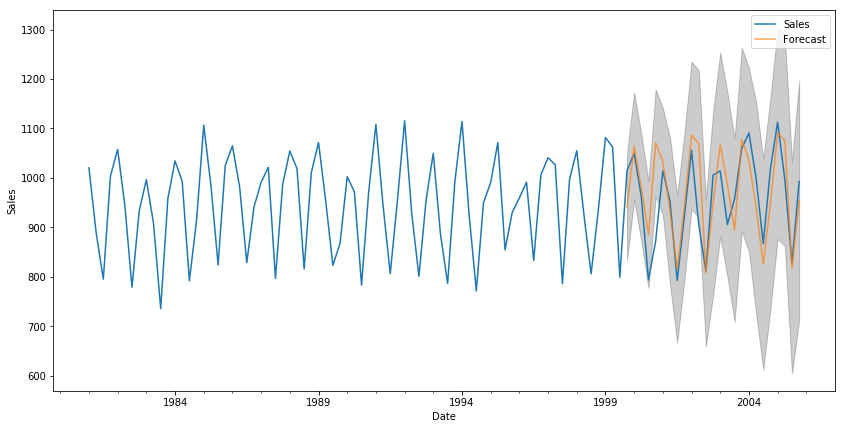

In [256]:
pred_ci = pred.conf_int()
ax=abc['1970':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7, figsize=(14,7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:,0],
                pred_ci.iloc[:,1],color='k',alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

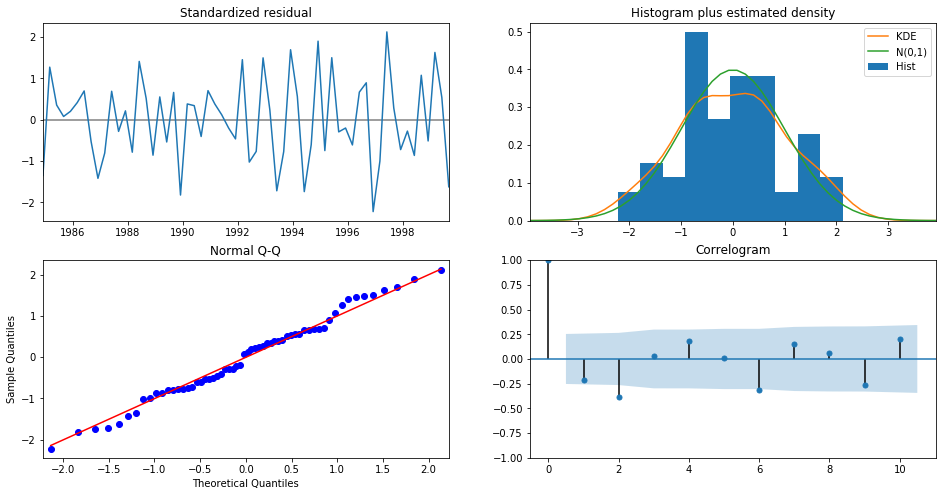

In [257]:
results.plot_diagnostics(figsize=(16,8))
plt.show()